In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
dataDir = '/Volumes/SanDiskSSD/BFH_backup/CAS_PML/Project/DeepFashion/data/test/'

In [32]:
img = plt.imread(dataDir + 'Anorak/Hooded_Cotton_Canvas_Anorak/img_00000005.jpg')

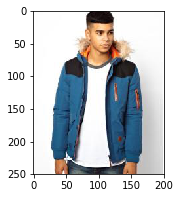

In [33]:
plt.figure(figsize=(3,3))
plt.imshow(img)

In [4]:
# works
train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)

In [5]:
# test here
train_datagen = ImageDataGenerator(rotation_range=30.,
                                   rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)


In [6]:
train_generator = train_datagen.flow_from_directory(
        dataDir,
        target_size=(150, 150),
        batch_size=32)

Found 40000 images belonging to 46 classes.


In [7]:
img=next(train_generator)

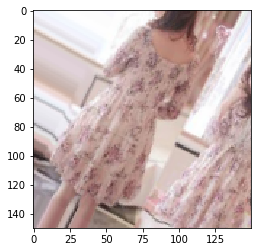

In [8]:
i = 1
plt.imshow(img[0][i])

In [9]:
myclasses = train_generator.class_indices
myclassesi = dict(zip(myclasses.values(),myclasses.keys()))

In [10]:
myclassesi[np.argmax(img[1][i])]

'Dress'

In [11]:
mytransform = train_datagen.get_random_transform(img[0][1].shape); mytransform

{'theta': -21.177685834968862,
 'tx': -9.802329528785405,
 'ty': 1.1042707988752705,
 'shear': -0.06969257890098493,
 'zx': 0.8272724683279646,
 'zy': 1.165072128063797,
 'flip_horizontal': 1,
 'flip_vertical': 0,
 'channel_shift_intensity': None,
 'brightness': None}

In [12]:
trans_img = train_datagen.apply_transform(img[0][i],mytransform)

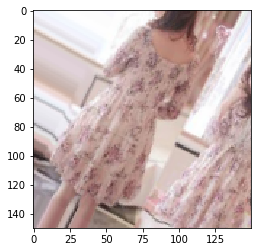

In [13]:
plt.imshow(img[0][i])

In [14]:
test_img = img[0][i]
x1,y1,x2,y2 = (50,50,100,100)
#bb_img = np.zeros((*test_img.shape[:2],1),dtype=int)
bb_img = np.zeros(test_img.shape,dtype=int)

In [15]:
bb_img[x1,y1,0] = 1
bb_img[x2,y1,0] = 2
bb_img[x2,y2,0] = 3
bb_img[x1,y2,0] = 4

In [16]:
rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1,edgecolor='r',facecolor='none')

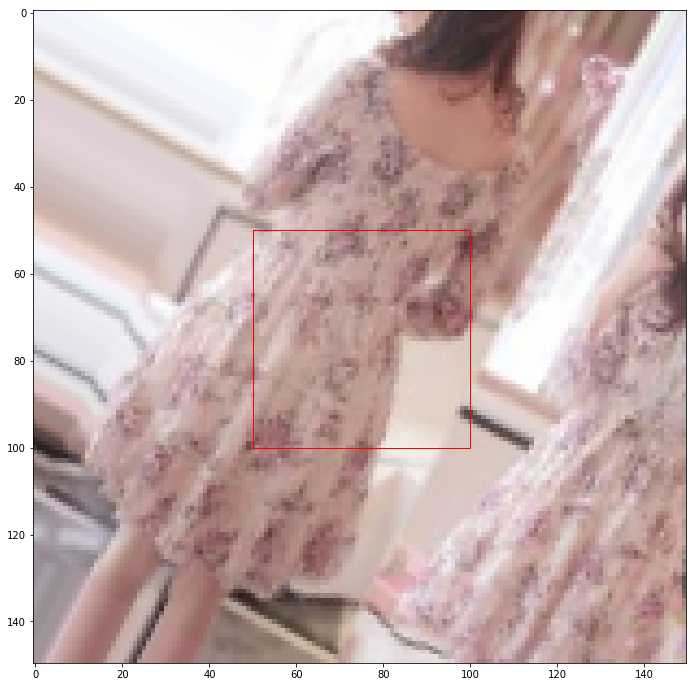

In [17]:
fig,ax = plt.subplots(1,figsize=(12,12))
ax.imshow(test_img)
ax.add_patch(rect)
plt.show()

In [18]:
mytransform = train_datagen.get_random_transform(test_img.shape); mytransform

{'theta': -20.947441966684003,
 'tx': 17.43487218368969,
 'ty': -16.54710761412886,
 'shear': -0.11671299324284119,
 'zx': 1.0881748699059934,
 'zy': 1.1432192017593923,
 'flip_horizontal': 1,
 'flip_vertical': 0,
 'channel_shift_intensity': None,
 'brightness': None}

In [19]:
trans_img = train_datagen.apply_transform(test_img,mytransform)

In [20]:
trans_bb = train_datagen.apply_transform(bb_img,mytransform)

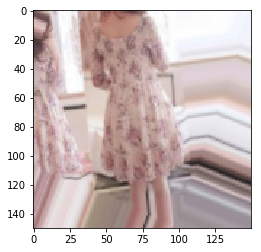

In [21]:
plt.imshow(trans_img)

In [22]:
trans_x=np.argwhere(trans_bb)

In [23]:
trans_x

array([[29, 47,  0],
       [30, 47,  0],
       [46, 88,  0],
       [72, 31,  0],
       [73, 31,  0],
       [89, 72,  0]])

In [24]:
tx1,ty1,_ = np.min(trans_x,0)
tx1,ty1

(29, 31)

In [25]:
tx2,ty2,_ = np.max(trans_x,0)
tx2,ty2

(89, 88)

In [26]:
rect = patches.Rectangle((tx1, ty1), tx2-tx1, ty2-ty1, linewidth=1,edgecolor='r',facecolor='none')

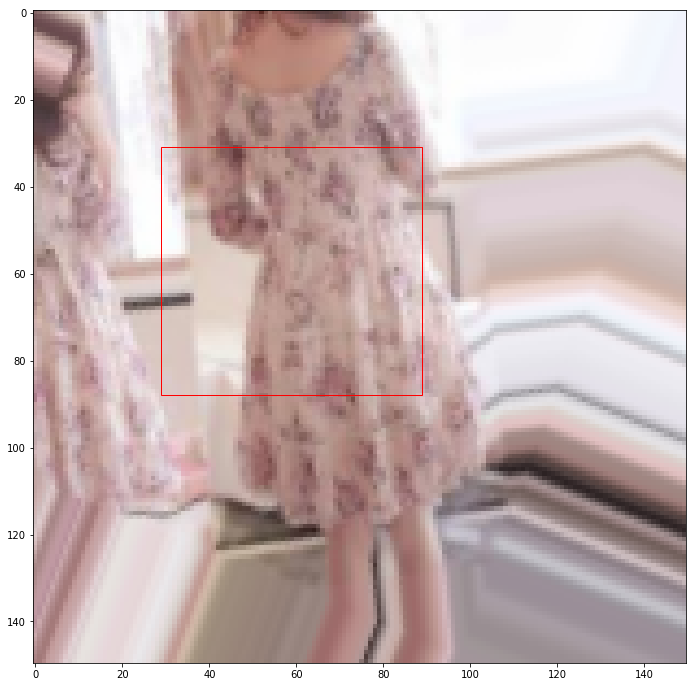

In [27]:
fig,ax = plt.subplots(1,figsize=(12,12))
ax.imshow(trans_img)
ax.add_patch(rect)
plt.show()

---
## Try with ImgAug
---

In [2]:
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug import parameters as iap
ia.seed(1)
dataDir = '/Volumes/SanDiskSSD/BFH_backup/CAS_PML/Project/DeepFashion/data/test/'
testFile = '../data/Img/Hooded_Cotton_Canvas_Anorak/img_00000005.jpg'

In [3]:
#img = plt.imread(dataDir + 'Anorak/Hooded_Cotton_Canvas_Anorak/img_00000005.jpg')
img = plt.imread(testFile)
img.shape

(250, 200, 3)

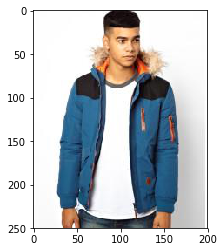

In [4]:
plt.imshow(img)

In [5]:
bbs = ia.BoundingBoxesOnImage([ia.BoundingBox(x1=80,y1=20,x2=120,y2=70)],shape=img.shape)

In [54]:
seq = iaa.Sequential([
        #iaa.PadToFixedSize(width=200, height=200),
        iaa.CropToFixedSize(width=200, height=200),
        iaa.PadToFixedSize(width=200, height=200),
        iaa.KeepSizeByResize(
            iaa.Affine(
                rotate=iap.Uniform(0.0, 5.0),
                #translate_px=iap.RandomSign(iap.Poisson(3))
                #translate_px = iap.RandomSign(iap.Poisson(img.shape[0]//20))
                translate_percent=iap.Uniform(0.0,0.1),
                #shear = iap.Uniform(-15.0,15.0),
                mode='constant',
                cval = 255,
                fit_output=True
            )
        ),
        iaa.Fliplr(0.5)
    ]).to_deterministic()

In [55]:
seq_det = seq

In [65]:
img_aug = seq_det.augment_images([img])[0]
bbs_aug = seq_det.augment_bounding_boxes([bbs])[0]

In [66]:
img_before = bbs.draw_on_image(img,thickness=2)
img_after = bbs_aug.draw_on_image(img_aug,thickness=2,color=[0,0,255])

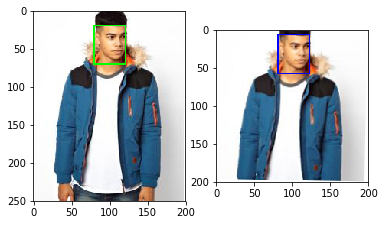

In [67]:
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.imshow(img_before)
ax2.imshow(img_after)

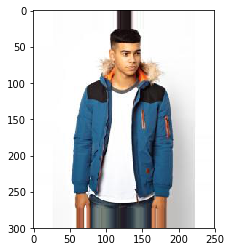

In [244]:
padMargin = max(*img.shape[:2]) // 10
img_pad = ia.pad(img,top=padMargin,bottom=padMargin,left=padMargin,right=padMargin,mode="edge")
plt.imshow(img_pad)

In [181]:
img_crop = img_pad[padMargin:-padMargin,padMargin:-padMargin,:]

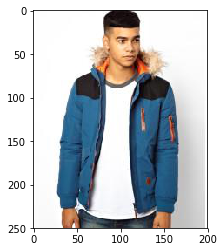

In [182]:
plt.imshow(img_crop)

In [1]:
img_crop

NameError: name 'img_crop' is not defined

In [183]:
help(iaa.Pad)

Help on function Pad in module imgaug.augmenters.size:

Pad(px=None, percent=None, pad_mode='constant', pad_cval=0, keep_size=True, sample_independently=True, name=None, deterministic=False, random_state=None)
    Augmenter that pads images, i.e. adds columns/rows to them.
    
    Parameters
    ----------
    px : None or int or imgaug.parameters.StochasticParameter or tuple, optional
        The number of pixels to crop away (cut off) on each side of the image.
        Either this or the parameter `percent` may be set, not both at the same
        time.
    
            * If None, then pixel-based cropping will not be used.
            * If int, then that exact number of pixels will always be cropped.
            * If StochasticParameter, then that parameter will be used for each
              image. Four samples will be drawn per image (top, right, bottom,
              left).
            * If a tuple of two ints with values a and b, then each side will
              be cropped by 

In [184]:
help(iaa.Affine)

Help on class Affine in module imgaug.augmenters.geometric:

class Affine(imgaug.augmenters.meta.Augmenter)
 |  Augmenter to apply affine transformations to images.
 |  
 |  This is mostly a wrapper around skimage's AffineTransform class and warp function.
 |  
 |  Affine transformations involve:
 |  
 |      - Translation ("move" image on the x-/y-axis)
 |      - Rotation
 |      - Scaling ("zoom" in/out)
 |      - Shear (move one side of the image, turning a square into a trapezoid)
 |  
 |  All such transformations can create "new" pixels in the image without a
 |  defined content, e.g. if the image is translated to the left, pixels
 |  are created on the right.
 |  A method has to be defined to deal with these pixel values. The
 |  parameters `cval` and `mode` of this class deal with this.
 |  
 |  Some transformations involve interpolations between several pixels
 |  of the input image to generate output pixel values. The parameter `order`
 |  deals with the method of interpolatio

In [313]:
from keras.preprocessing import image

Using TensorFlow backend.


In [315]:
imgKeras = image.load_img(dataDir + 'Anorak/Hooded_Cotton_Canvas_Anorak/img_00000005.jpg')

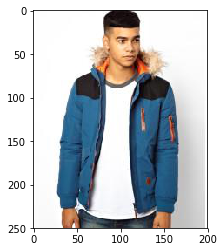

In [319]:
plt.imshow(imgKeras)

module

In [175]:
padMargin

250